In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

matplotlib.use('Agg')

In [2]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTIONS_FIGS=[ '←', '↑', '→', '↓']


ACTION_PROB = 0.25

In [3]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

In [4]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):

        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
        

    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

In [12]:
def draw_policy(optimal_values):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = optimal_values.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(optimal_values):
        next_vals=[]
        for action in ACTIONS:
            next_state, _ = step([i, j], action)
            next_vals.append(optimal_values[next_state[0],next_state[1]])

        print("next_vals:", next_vals)
        best_actions=np.where(next_vals == np.max(next_vals))[0]
        print("best_actions",best_actions)
        val=''
        for ba in best_actions:
            val+=ACTIONS_FIGS[ba]
        
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')

    # Row and column labels...
    for i in range(len(optimal_values)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                   edgecolor='none', facecolor='none')

    ax.add_table(tb)

values: [-1.0, -1.0, 0.0, 0.0]
new_value[ 0 , 0 ]: 0.0
values: [10.0, 10.0, 10.0, 10.0]
new_value[ 0 , 1 ]: 10.0
values: [0.0, -1.0, 0.0, 0.0]
new_value[ 0 , 2 ]: 0.0
values: [5.0, 5.0, 5.0, 5.0]
new_value[ 0 , 3 ]: 5.0
values: [0.0, -1.0, -1.0, 0.0]
new_value[ 0 , 4 ]: 0.0
values: [-1.0, 0.0, 0.0, 0.0]
new_value[ 1 , 0 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 1 , 1 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 1 , 2 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 1 , 3 ]: 0.0
values: [0.0, 0.0, -1.0, 0.0]
new_value[ 1 , 4 ]: 0.0
values: [-1.0, 0.0, 0.0, 0.0]
new_value[ 2 , 0 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 2 , 1 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 2 , 2 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 2 , 3 ]: 0.0
values: [0.0, 0.0, -1.0, 0.0]
new_value[ 2 , 4 ]: 0.0
values: [-1.0, 0.0, 0.0, 0.0]
new_value[ 3 , 0 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 3 , 1 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
new_value[ 3 , 2 ]: 0.0
values: [0.0, 0.0, 0.0, 0.0]
ne

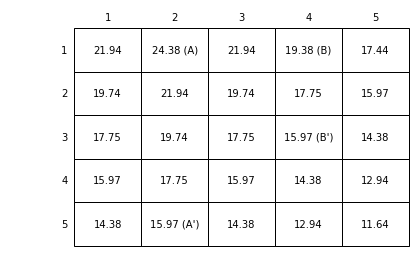

new_value antes de dibujar policy: [[21.93799152 24.37554613 21.93799152 19.37554613 17.43799152]
 [19.74419237 21.93799152 19.74419237 17.74758782 15.97282904]
 [17.74758782 19.74419237 17.74758782 15.97282904 14.37554613]
 [15.97282904 17.74758782 15.97282904 14.37554613 12.93799152]
 [14.37554613 15.97282904 14.37554613 12.93799152 11.64419237]]
next_vals: [21.937991519867087, 21.937991519867087, 24.37554613318565, 19.744192367880377]
best_actions [2]
next_vals: [15.972829036872946, 15.972829036872946, 15.972829036872946, 15.972829036872946]
best_actions [0 1 2 3]
next_vals: [24.37554613318565, 21.937991519867087, 19.37554613318565, 19.744192367880377]
best_actions [0]
next_vals: [15.972829036872946, 15.972829036872946, 15.972829036872946, 15.972829036872946]
best_actions [0 1 2 3]
next_vals: [19.37554613318565, 17.437991519867087, 17.437991519867087, 15.972829036872946]
best_actions [0]
next_vals: [19.744192367880377, 21.937991519867087, 21.937991519867087, 17.747587818747718]
best

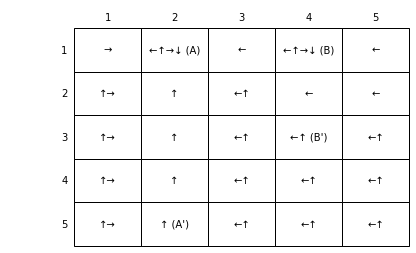

In [13]:
if __name__ == '__main__':

    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    iteracion = 0

    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                values = []
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # value iteration
                    values.append(reward + DISCOUNT * value[next_i, next_j])
                new_value[i, j] = np.max(values)
                print("values:", values)
                print("new_value[",i,",", j,"]:", new_value[i, j])

        iteracion += 1
        print("iteracion:", iteracion)
        print("np.sum(np.abs(new_value - value)):", np.sum(np.abs(new_value - value)))        
        if np.sum(np.abs(new_value - value)) < 1e-1: # el valor original es 1e-4
            draw_image(np.round(new_value, decimals=2))
            #plt.savefig('../images/figure_3_5.png')
            plt.show()
            plt.close()
            print("new_value antes de dibujar policy:", new_value)
            draw_policy(new_value)
            #plt.savefig('../images/figure_3_5_policy.png')
            plt.show()
            plt.close()
            break
        value = new_value